Found 1664 images belonging to 3 classes.
Found 415 images belonging to 3 classes.
(64, 224, 224, 3)


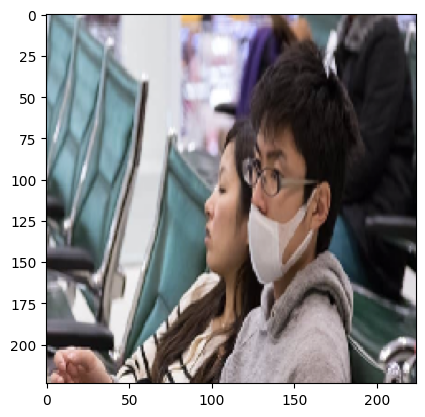

(64, 224, 224, 3)


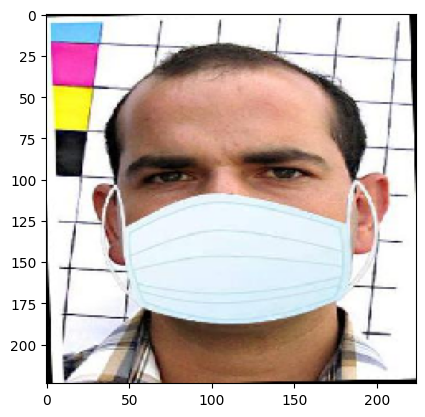

(64, 224, 224, 3)


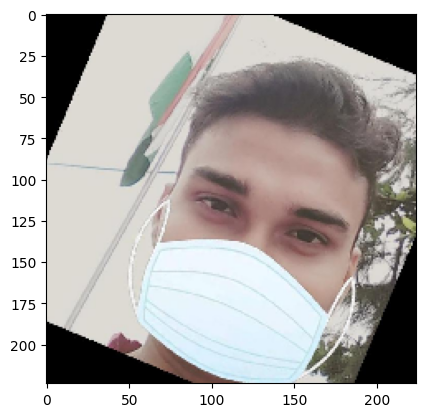

(64, 224, 224, 3)


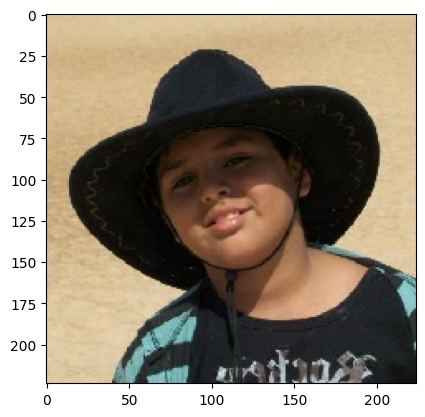

(64, 224, 224, 3)


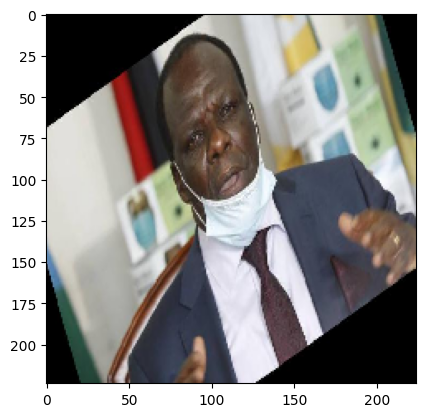

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,828,067 (392.26 MB)

 Trainable params: 102,828,067 (392.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.4199 - loss: 3.7401 - val_accuracy: 0.8241 - val_loss: 0.4886
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.7690 - loss: 0.6314 - val_accuracy: 0.8723 - val_loss: 0.3825
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.8333 - loss: 0.4762 - val_accuracy: 0.9012 - val_loss: 0.2931
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.8214 - loss: 0.4563 - val_accuracy: 0.9108 - val_loss: 0.2701
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 129s 5s/step - accuracy: 0.8873 - loss: 0.2832 - val_accuracy: 0.8313 - val_loss: 0.5338
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.9063 - loss: 0.2777 - val_accuracy: 0.9253 - val_loss: 0.2112
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.9385 - loss: 0.1435 - val_accuracy: 0.6916 - val_loss: 1.1685
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.9069 - loss: 0.3599 - val_accuracy: 0.9012 - val_loss: 0.

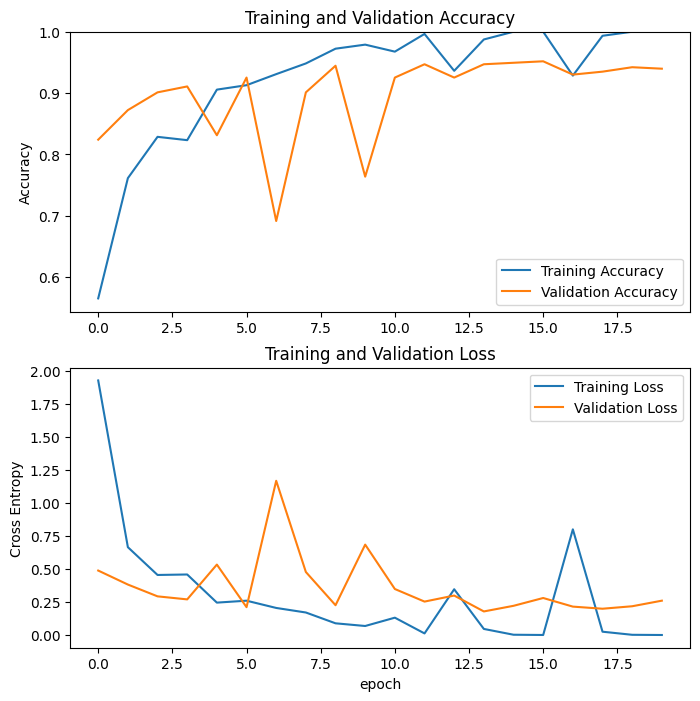

In [2]:
# dataset : https://www.kaggle.com/datasets/spandanpatnaik09/face-mask-detectormask-not-mask-incorrect-mask/
# mask, no mask, and incorrect mask detection
import os

import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16


#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#-----1. duplicate data-----

data_path = "data/dataset_mask"
base_dir = os.path.join(data_path)

IMAGE_SIZE = 224 #model input size
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1./255,
        validation_split=0.2)

train_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size = BATCH_SIZE,
        subset='training')

val_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size = BATCH_SIZE,
        subset='validation')

#visualisasi

for _ in range(5):
    img, label = train_generator.__next__()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()
    
    
for image_batch,label_batch in train_generator:
    break
image_batch.shape, label_batch.shape

IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
num_classes=3


model = Sequential()
 
#------------------------------------
# Conv Block 1: 32 Filters, MaxPool.
#------------------------------------
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=IMG_SHAPE))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1)) 
#------------------------------------
# Conv Block 2: 64 Filters, MaxPool.
#------------------------------------
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the convolutional features.
#------------------------------------
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'],
             )

model.summary()
epochs = 20
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)
loss, acc = model.evaluate(val_generator, verbose=1)
#start plotting here
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
This image most likely belongs to incorrect mask with a 57.57 percent confidence.


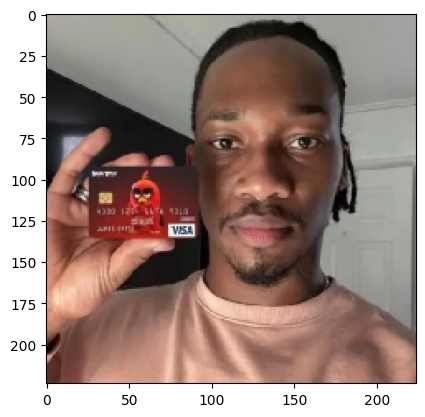

In [10]:
# using the model
# using the model to predict
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# pick input image
img_path = 'data/input/amba.jpg'
# img_path = 'data/input/ilustrasi-anak-anjing_43.jpeg'

# load image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0 # convert image to np array and normalize
img_array = np.expand_dims(img_array, axis=0)

masker = "mask"
unmasker = "no mask"
incorrect = "incorrect mask"

# predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# print result
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(
        masker if np.argmax(score) == 0 else unmasker if np.argmax(score) == 1 else incorrect,
        100 * np.max(score)
    )
)

# show image
plt.imshow(img)
plt.show()